# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

## Begin solutions
### Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

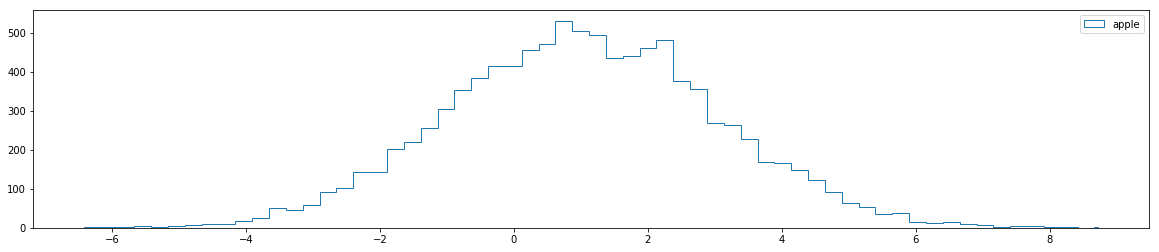

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

plt.rc('figure', figsize=(20.0, 4.0))

sample_size = 10_000
samples = sp.stats.norm(1,2).rvs(sample_size)

#Or better yet
q_25,q_75 = np.percentile(samples,[25,75])
σ_G = 0.7413*(q_75-q_25) 
binsize = 2.7*σ_G/(len(samples)**(1/3))
bins = np.append(np.arange(samples.min(),samples.max(),binsize),samples.max())

___ = plt.hist(samples,bins,histtype='step',label='apple')
___ = plt.legend()